### Imports

In [1]:
from agents.fact_checker_agent import FactCheckerAgent
from network.socialnetwork import SocialNetworkEnv
from agents.news_agent import NewsAgent
import numpy as np

### Setup

In [2]:
network = SocialNetworkEnv(numConsumer=4)

# created a fake and real info agent and add a few consumers to the network
fAgent = NewsAgent("fake-information", env=network, trustLevel=0)
# fAgent2 = NewsAgent("fake-information", state_space_size=2, env=network, trustLevel=0)
# fAgent3 = NewsAgent("fake-information", state_space_size=2, env=network, trustLevel=0)
rAgent = NewsAgent("real-information", env=network, trustLevel=0)
fcAgent = FactCheckerAgent("fact-checker", trustLevel=0.0, env=network)

network.add_news_agents_to_network(agentType=fAgent)

# network.add_news_agents_to_network(agentType=fAgent2)
# network.add_news_agents_to_network(agentType=fAgent3)
network.add_news_agents_to_network(agentType=rAgent)
network.add_fact_checker_to_network(agentType=fcAgent)

# print("---------------- Initial Graph ---------------")
network.print_graph()

Node 0: Points to -> None
Node 1: Points to -> 3, 2
Node 2: Points to -> 1, 3
Node 3: Points to -> 0
Node 4: Points to -> 0, 1, 2, 3
Node 5: Points to -> 0, 1, 2, 3
Node 6: Points to -> 0


### Training


--------- epoch 0 ---------------------
action [0 1 0 0]
Trust Levels:
Fake Agent: orig []
Agent type: fake-information penalty: 2 reward: 1 trust level: 0.25
Fact-checker penalized news agent {'agentType': 'fake-information', 'qVal': -0.1, 'trustLevel': 0.0, 'reward': 1, 'penalty': 2}.


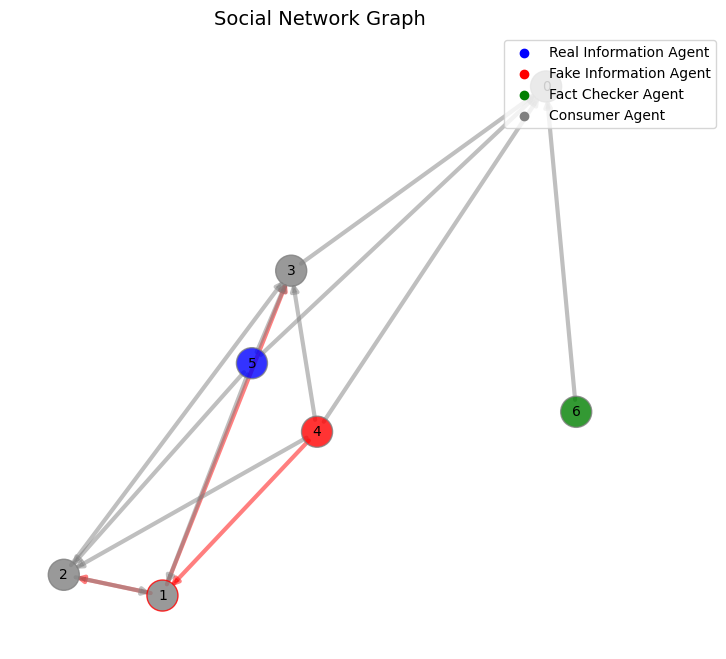


--------- epoch 1 ---------------------
action [1 0 1 1]
Trust Levels:
Fake Agent: orig []
Agent type: fake-information penalty: 5 reward: 2 trust level: 0.5
Fact-checker penalized news agent {'agentType': 'fake-information', 'qVal': -0.39, 'trustLevel': 0.0, 'reward': 2, 'penalty': 5}.


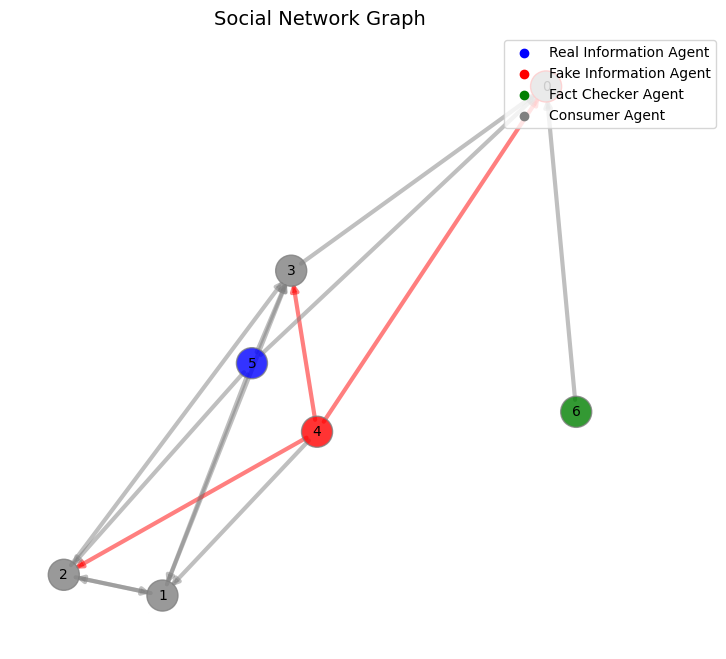


--------- epoch 2 ---------------------
action [0 1 0 0]
Trust Levels:
Fake Agent: orig []
Agent type: fake-information penalty: 7 reward: 2 trust level: 0.5
Fact-checker penalized news agent {'agentType': 'fake-information', 'qVal': -0.8510000000000001, 'trustLevel': 0.0, 'reward': 2, 'penalty': 7}.


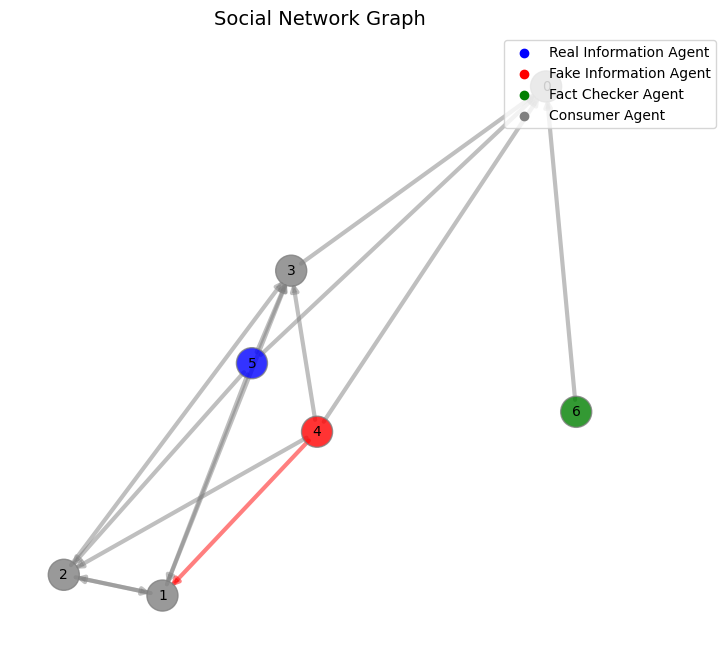


--------- epoch 3 ---------------------
action [0 1 0 1]
Trust Levels:
Fake Agent: orig []
Agent type: fake-information penalty: 9 reward: 4 trust level: 0.75
Fact-checker penalized news agent {'agentType': 'fake-information', 'qVal': -1.2659000000000002, 'trustLevel': 0.0, 'reward': 4, 'penalty': 9}.


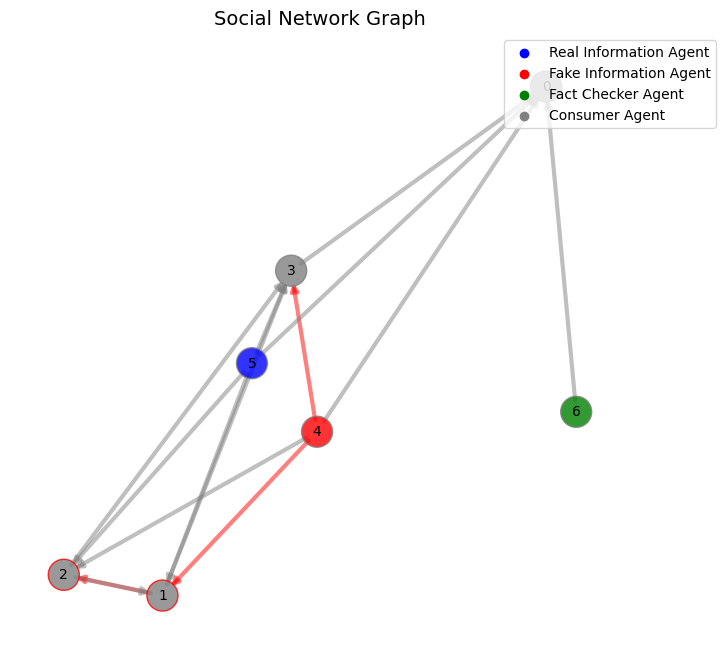


--------- epoch 4 ---------------------
action [0 1 1 1]
Trust Levels:
Fake Agent: orig []
Agent type: fake-information penalty: 13 reward: 4 trust level: 0.75
Fact-checker penalized news agent {'agentType': 'fake-information', 'qVal': -2.0393100000000004, 'trustLevel': 0.0, 'reward': 4, 'penalty': 13}.


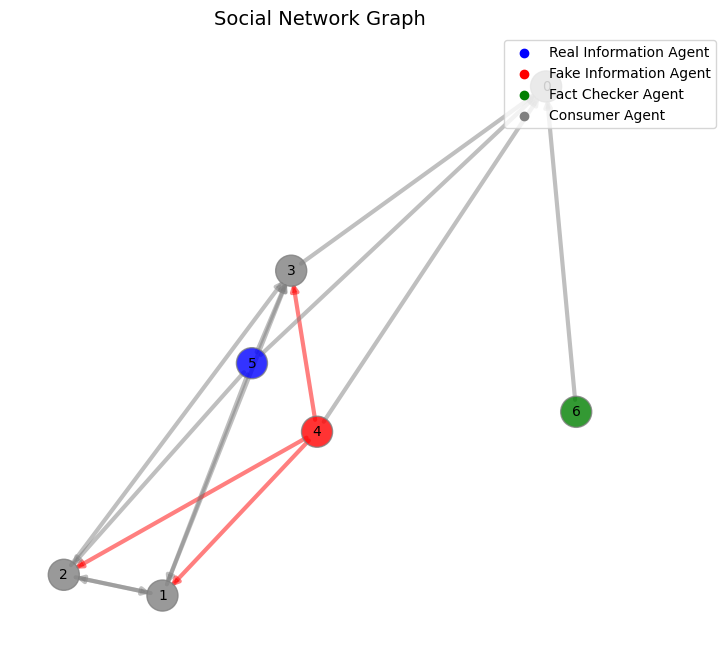


--------- epoch 5 ---------------------
action [0 0 1 1]
Trust Levels:
Fake Agent: orig []
Agent type: fake-information penalty: 16 reward: 4 trust level: 0.75
Fact-checker penalized news agent {'agentType': 'fake-information', 'qVal': -3.0353790000000003, 'trustLevel': 0.0, 'reward': 4, 'penalty': 16}.


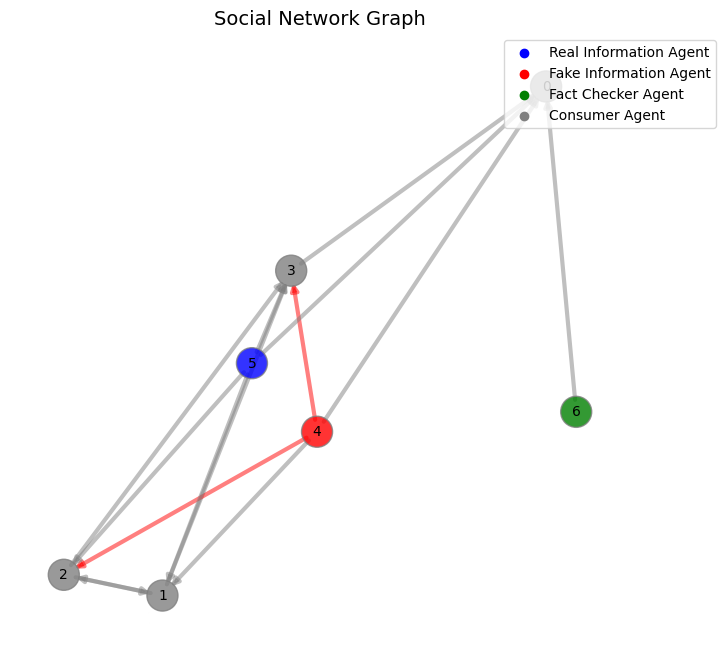


--------- epoch 6 ---------------------
action [1 0 0 1]
Trust Levels:
Fake Agent: orig []
Agent type: fake-information penalty: 18 reward: 5 trust level: 0.75
Fact-checker penalized news agent {'agentType': 'fake-information', 'qVal': -4.0318411, 'trustLevel': 0.0, 'reward': 5, 'penalty': 18}.


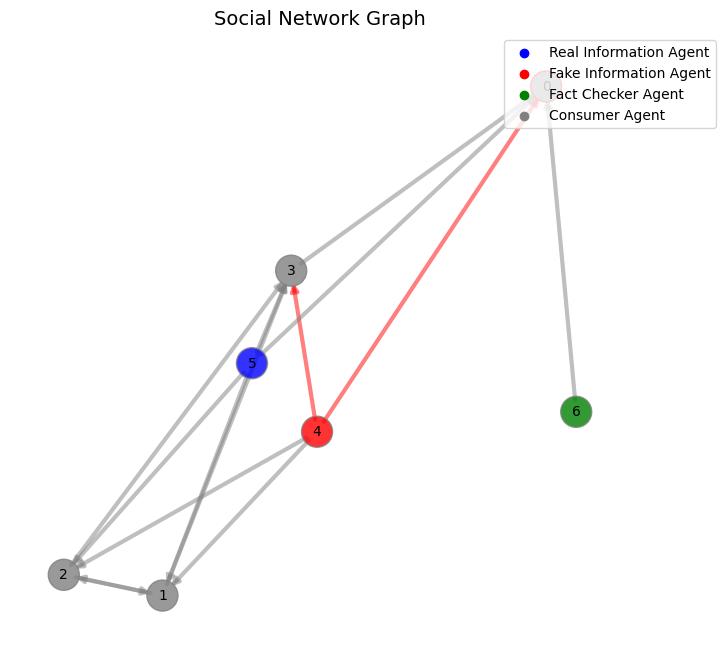

In [3]:
for i in range(network.network_size):
    print(f"\n--------- epoch {i} ---------------------")

    fAgent_action = network.draw_sample_from_action_space()
    fAgent_action2 = network.draw_sample_from_action_space()
    fAgent_action3 = network.draw_sample_from_action_space()
    rAgent_action = network.draw_sample_from_action_space()
    print('action', fAgent_action)

    print("Trust Levels:")
    print("Fake Agent: ", end="")
    reward, penalty, influenced, qVal = network.step(fAgent_action, fAgent)

    # print("Fake Agent 2: ", end="")
    # reward22, penalty22 = network.step(fAgent_action2, fAgent2)
    
    # print("Fake Agent 3: ", end="")
    # reward3, penalty3 = network.step(fAgent_action3, fAgent3)

    # print("Real Agent: ", end="")
    # reward2, penalty2 = network.step(rAgent_action, rAgent)

    network.step_fact_checker(fcAgent, threshold=0.1)

    network.render()
    # network.print_graph()

    # print(f"\nfake info - reward: {reward}, penalty : {penalty}")
    # print(f"\nfake info 2 - reward: {reward22}, penalty : {penalty22}")
    # print(f"\nfake info 3 - reward: {reward3}, penalty : {penalty3}")
    # print(f"real info - reward: {reward2}, penalty : {penalty2}")
    # print(f"fact checker - reward: {fcAgent.reward} penalty: {fcAgent.penalty}")
